In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## (a)

In [37]:
img = cv2.imread("integrated-ckt-damaged.tif", cv2.IMREAD_GRAYSCALE)
w = img.shape[0]
h = img.shape[1]

cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## (b)

In [38]:
imgb = np.pad(img, [(0, w), (0, h)])
cv2.imshow('image', imgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

## (c)

In [84]:
imgc = np.zeros((w*2,h*2))
#imgc = imgb * pow(-1, x+y)

w2 = imgb.shape[0]
h2 = imgb.shape[1]

for x in range(1,w2):
    for y in range(1,h2):
        imgc[x,y] = imgb[x,y]*pow(-1,x+y)
        
        
cv2.imshow('image', imgc)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image_c.jpg', imgc)

True

## (d)

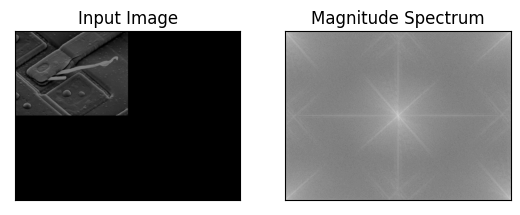

True

In [88]:
# imgc = cv2.imread('image_c.jpg',-1)
dft = cv2.dft(np.float32(imgc), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

imgd = 20*np.log(cv2.magnitude(dft_shift[:,:,1],dft_shift[:,:,1])) #magnitude_spectrum

# cv2.imshow('image', magnitude_spectrum)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


plt.subplot(121),plt.imshow(imgc, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgd, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('image_d.jpg', imgd)

## (e) 

In [96]:
sigma2 = 2500
mask = np.zeros((w*2,h*2, 2))
for i in range(w*2):
    for j in range(h*2):
        D = np.sqrt((i-w)**2 + (j-h)**2)
        mask[i,j] = np.exp(-(D*D)/(2*sigma2))

fShift = dft_shift * mask

imge = mask[:,:,0]
imge = np.uint8(cv.normalize(imge, None, 0, 255, cv2.NORM_MINMAX))
cv2.imshow('image', imge)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image_e.jpg', imge)

True

## (f) 

In [97]:
imgf = imgd * imge
imgf = np.uint8(cv2.normalize(imgf, None, 0, 255, cv2.NORM_MINMAX))
cv2.imshow('image', imgf)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image_f.jpg', imgf)

True

## (g)

In [98]:
ishift = np.fft.ifftshift(fShift)
idft = cv2.idft(ishift)
imgg = cv2.magnitude(idft[:,:,0], idft[:,:,1])
imgg = np.uint8(cv2.normalize(imgg, None, 0, 255, cv2.NORM_MINMAX))

cv2.imshow('image', imgg)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image_g.jpg', imgg)

True

## (h) 

In [99]:
imgh = imgg[0:x, 0:y]
cv2.imshow('image', imgh)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('image_h.jpg', imgh)

True